Shannon Hall

8/5/25

Visualizing a Hadamard matrix can make it easier to see the underlying patterns of the matrix, as can be seen [here](https://www.flickr.com/photos/nasa-jpl/16680460890/in/photostream/). In this program we implement a function that can be used to visualize both real and complex Hadamard matrices; the function colors the entries of the matrix based off of their argument (or angle). We include some examples of Hadamard matrices being visualized. In these examples we include some methods of generating real Hadamard matrices, such as Sylvester's construction or Paley's construction, which can be found [here](https://trace.tennessee.edu/utk_chanhonoproj/2266/).

# The visualization function

In [10]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.backends.backend_pdf import PdfPages

# Given a Hadamard matrix, create a figure to visualize it
def visualize(matrix, title='', text='', grid=False, gridlabels=False, cmap='managua', colors=[], colorbar=False, displaynow=False, figsize=(6.4, 4.8)):
    # Get the angle of each entry in the matrix
    angles = np.angle(matrix)

    # Create a colormap from the given colors
    if colors:
        cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

    # Create the figure
    fig, ax = plt.subplots()
    plt.imshow(angles, cmap=cmap, vmin=-np.pi, vmax=np.pi)

    # Show a colorbar beside the figure
    if colorbar:
        cbar = plt.colorbar(ticks=[-np.pi, 0, np.pi])
        cbar.ax.set_yticklabels(['-π', '0', 'π'])

    # Set the title of the figure
    if title:
        plt.title(title)

    # Draw a grid on the figure
    if grid:
        n = matrix.shape[0]
        ax.set_xticks(np.arange(-.5, n - 1, 1))
        ax.set_yticks(np.arange(-.5, n - 1, 1))
        ax.grid(linestyle='-')
        ax.spines['bottom'].set_color('gray')
        ax.spines['top'].set_color('gray') 
        ax.spines['right'].set_color('gray')
        ax.spines['left'].set_color('gray')
        if gridlabels:
            ax.set_xticklabels(np.arange(1, n + 1, 1))
            ax.set_yticklabels(np.arange(1, n + 1, 1))
            ax.xaxis.tick_top()
            ax.tick_params(axis='x', colors='gray')
            ax.tick_params(axis='y', colors='gray')
        else:
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            for tick in ax.xaxis.get_major_ticks():
                tick.tick1line.set_visible(False)
                tick.tick2line.set_visible(False)
            for tick in ax.yaxis.get_major_ticks():
                tick.tick1line.set_visible(False)
                tick.tick2line.set_visible(False)
    else:
        ax.axis('off')

    # Add text to the figure
    if text:
        plt.text(0.5, -0.05, text, transform=plt.gca().transAxes, ha='center')

    # Display the figure
    if displaynow:
        plt.show()
    plt.close()

    return fig

# Save figures to a pdf
def save_to_pdf(figs, pdf_name):
    # Create a pdf
    pdf = PdfPages(pdf_name)

    # If only one figure is given, put it into a list
    if not isinstance(figs, list):
        figs = [figs]

    # Save each figure to the pdf
    for fig in figs:
        fig.savefig(pdf, format='pdf')
    pdf.close()

# Check if the given matrix is a Hadamard matrix (assuming it is square and has entries with modulus 1)
def check_hadamard(matrix, error_threshold=1e-10):
    n = matrix.shape[0]
    return np.linalg.norm(matrix @ matrix.conj().T - n * np.eye(n)) < error_threshold

# Examples with complex Hadamard matrices

## Fourier matrices

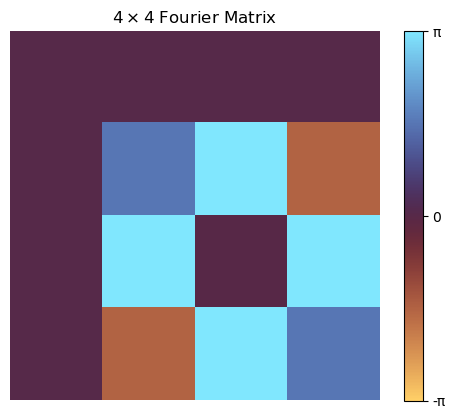

In [11]:
# Get the nth Fourier matrix
def fourier(n):
    x = np.exp(2 * np.pi * 1j / n)
    return np.array([[x**(j * k) for k in range(n)] for j in range(n)])

# Visualize the 4x4 Fourier matrix
fig = visualize(fourier(4), title=r'$4 \times 4$ Fourier Matrix', colorbar=True, displaynow=True)

# Visualize Fourier matrices of sizes 2 to 50 and save to a PDF
figs = [visualize(fourier(i), title=rf'${i} \times {i}$ Fourier Matrix') for i in range(2, 50)]
save_to_pdf(figs, 'fourier_matrices.pdf')

## Petrescu's matrices

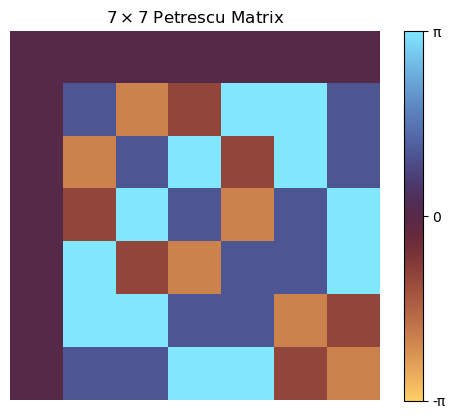

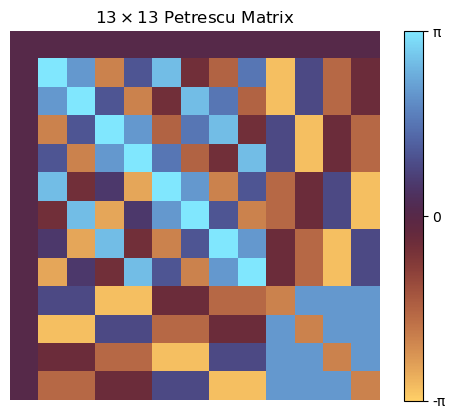

In [12]:
# Create Petrescu's 7x7 matrix
x = np.exp(2 * np.pi  * 1j / 6)
P7_exponents = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 4, 5, 3, 3, 1],
    [0, 4, 1, 3, 5, 3, 1],
    [0, 5, 3, 1, 4, 1, 3],
    [0, 3, 5, 4, 1, 1, 3],
    [0, 3, 3, 1, 1, 4, 5],
    [0, 1, 1, 3, 3, 5, 4]])
P7 = np.power(x, P7_exponents)

# Create Petrescu's 13x13 matrix
x = np.exp(np.pi * 1j / 30)
P13_exponents = np.array([
    [0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
    [0, 30, 20, 40, 10, 25, 55, 45, 15, 32,  8, 44, 56],
    [0, 20, 30, 10, 40, 55, 25, 15, 45, 32,  8, 44, 56],
    [0, 40, 10, 30, 20, 45, 15, 25, 55,  8, 32, 56, 44],
    [0, 10, 40, 20, 30, 15, 45, 55, 25,  8, 32, 56, 44],
    [0, 25, 55,  5, 35, 30, 20, 40, 10, 44, 56,  8, 32],
    [0, 55, 25, 35,  5, 20, 30, 10, 40, 44, 56,  8, 32],
    [0,  5, 35, 25, 55, 40, 10, 30, 20, 56, 44, 32,  8],
    [0, 35,  5, 55, 25, 10, 40, 20, 30, 56, 44, 32,  8],
    [0,  8,  8, 32, 32, 56, 56, 44, 44, 40, 20, 20, 20],
    [0, 32, 32,  8,  8, 44, 44, 56, 56, 20, 40, 20, 20],
    [0, 56, 56, 44, 44, 32, 32,  8,  8, 20, 20, 40, 20],
    [0, 44, 44, 56, 56,  8,  8, 32, 32, 20, 20, 20, 40]])
P13 = np.power(x, P13_exponents)

# Visualize Petrescu's 7x7 matrix
fig = visualize(P7, title=r'$7 \times 7$ Petrescu Matrix', colorbar=True, displaynow=True)

# Visualize Petrescu's 13x13 matrix
fig = visualize(P13, title=r'$13 \times 13$ Petrescu Matrix', colorbar=True, displaynow=True)

# Save Petrescu's matrices to a PDF
save_to_pdf([visualize(P7, title=r'$7 \times 7$ Petrescu Matrix'), visualize(P13, title=r'$7 \times 7$ Petrescu Matrix')], 'petrescu_matrices.pdf')

# Examples with real Hadamard matrices

## Sylvester's construction

In [13]:
# Return the Sylvester matrix with the given order
def sylvester(n):
    # Check if n is a power of 2
    if not (int(n) and (not(int(n) & (int(n) - 1)))):
        print('n must be a power of 2')
        return np.eye(1)
    
    # For the base case, return the 1x1 identity matrix
    if (n == 1):
        return np.eye(1)
    # Otherwise, recursively build the Sylvester matrix by using four blocks of smaller Sylvester matrices
    else:
        return np.block([[sylvester(n / 2), sylvester(n / 2)], [sylvester(n / 2), sylvester(n / 2) * -1]])

# Return a list containing all Sylvester matrices with order <= 2^k
def sylvester_list(k):
    matrices = []
    previous = np.eye(1)
    matrices.append(previous)
    for i in range(k):
        next = np.block([[previous, previous], [previous, previous * -1]])
        previous = next
        matrices.append(previous)
    return matrices

# Visualize Sylvester matrices of orders up to 2^8
sylvester_matrices = sylvester_list(8)
sylvester_figs = [visualize(matrix, title=rf'${2**i} \times {2**i}$ Sylvester construction', colors=['blue', 'blue', 'white']) for i, matrix in enumerate(sylvester_matrices)]
save_to_pdf(sylvester_figs, 'sylvester_matrices.pdf')

## Paley's constructions

In [14]:
# Create Paley matrix with the given order
def paley1(m):
    # Check that m is of the form p + 1, where p is a prime congruent to 3 mod 4
    p = m - 1
    if (not sp.isprime(p)) or (p % 4 != 3):
        print('m must be of the form p + 1, where p is a prime congruent to 3 mod 4')
        return np.eye(1)
    
    # Construct the Paley matrix using the Legendre symbol
    matrix = np.zeros((m, m))
    for i in range(m):
        for j in range(m):
            if (i == 0 or j == 0):
                matrix[i, j] = 1
            if (1 <= i <= p and 1 <= j <= p and i != j):
                matrix[i, j] = sp.legendre_symbol(j - i, p)
            if (1 <= i <= p):
                matrix[i, i] = -1
    for i in range(1, m):
        matrix[i] *= -1
    return matrix

# Visualize the first n Paley matrices
n = 13
orders = []
prime = 2
while (len(orders) < n):
    if (prime % 4 == 3):
        orders.append(prime + 1)
    prime = sp.nextprime(prime)
paley_matrices1 = [paley1(m) for m in orders]
paley_figs1 = [visualize(matrix, title=rf'${m} \times {m}$ Paley construction (1)', colors=['red', 'red', 'white']) for m, matrix in zip(orders, paley_matrices1)]
save_to_pdf(paley_figs1, 'paley_matrices1.pdf')

In [15]:
# Create Paley matrix with order 2^k(p+1)
def paley2(k, p):
    # Check that m is of the form 2^k(p + 1), where p is a prime, m is divisible by 4, and k is at least 1
    m = (2**k) * (p + 1)
    if (not sp.isprime(p)) or (m % 4 != 0) or (k < 1):
        print('m must be of the form 2^k(p + 1), where p is a prime, m is divisible by 4, and k is at least 1')
        return np.eye(1)
    
    # Create a temporary matrix using the Legendre symbol
    temp = np.zeros((p + 1, p + 1))
    for i in range(1, p + 1):
        temp[i, 0] = 1
        temp[0, i] = 1
    for i in range(1, p + 1):
        for j in range(1, p + 1):
            if (i != j):
                temp[i, j] = sp.legendre_symbol(j - i, p)
            if (1 <= i <= p):
                temp[i, i] = -1
    for i in range(0, p + 1):
        temp[i, i] = 0

    # Store some blocks
    option1 = np.matrix([[1, 1], [1, -1]])
    option2 = np.matrix([[-1, -1], [-1, 1]])
    option3 = np.matrix([[1, -1], [-1, -1]])

    # Using the temporary matrix, create the Paley matrix
    blocks = []
    for i in range(p + 1):
        blocks.append([])
        for j in range(p + 1):
            if temp[i, j] == 1:
                blocks[i].append(option1)
            elif temp[i, j] == -1:
                blocks[i].append(option2)
            else:
                blocks[i].append(option3)

    # Combine the blocks into a larger matrix and return it
    matrix = np.block(blocks)
    return matrix

# Visualize some of these Paley matrices
max_k = 2
max_p = 50
sizes = {}
matrices = []
for k in range(1, max_k):
    for p in sp.primerange(max_p):
        m = (2**k) * (p + 1)
        if (m % 4 == 0) and (p % 4 == 1):
            sizes[m] = (k, p)
paley_matrices2 = [paley2(sizes[size][0], sizes[size][1]) for size in sizes]
paley_figs2 = [visualize(matrix, title=rf'${size} \times {size}$ Paley construction (2)', colors=['red', 'red', 'white']) for size, matrix in zip(sizes.keys(), paley_matrices2)]
save_to_pdf(paley_figs2, 'paley_matrices2.pdf')

## William's construction

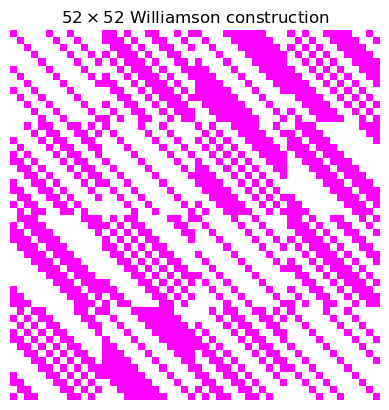

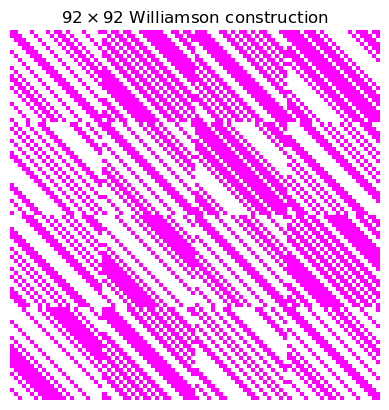

In [16]:
# Create a circulant matrix from the given first row
def circulant(first_row):
    n = len(first_row)
    circulant_matrix = np.zeros((n, n))
    for i in range(n):
        circulant_matrix[i] = np.roll(first_row, i)
    return circulant_matrix

def williamson(A, B, C, D):
    return np.block([[A, B, C, D], [-B, A, D, -C], [-C, -D, A, B], [-D, C, -B, A]])

# Create a 52 x 52 Hadamard matrix using William's construction
A = circulant([1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1])
B = circulant([1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1])
C = circulant([1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1])
D = circulant([1, -1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, -1])
matrix1 = williamson(A, B, C, D)

# Create a 92 x 92 Hadamard matrix using William's construction
A = circulant([1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1])
B = circulant([1, -1, 1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1])
C = circulant([1, 1, 1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1])
D = circulant([1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1])
matrix2 = williamson(A, B, C, D)

# Store these matrices for later
williamson_matrices = [matrix1, matrix2]

# Visualize these matrices
fig1 = visualize(matrix1, title=r'$52 \times 52$ Williamson construction', colors=['magenta', 'magenta', 'white'], displaynow=True)
fig2 = visualize(matrix2, title=r'$92 \times 92$ Williamson construction', colors=['magenta', 'magenta', 'white'], displaynow=True)
williamson_figs = [fig1, fig2]

# Save these matrices to a pdf
save_to_pdf(williamson_figs, 'williamson_matrices.pdf')

## Combining Hadamard matrices

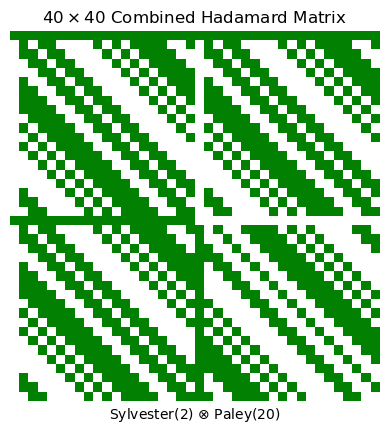

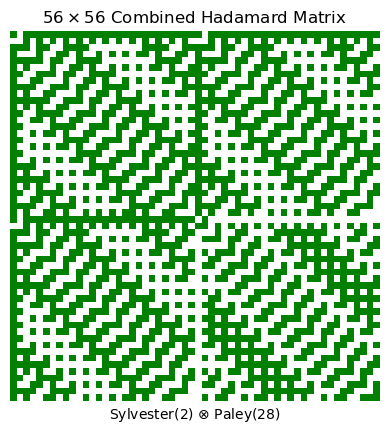

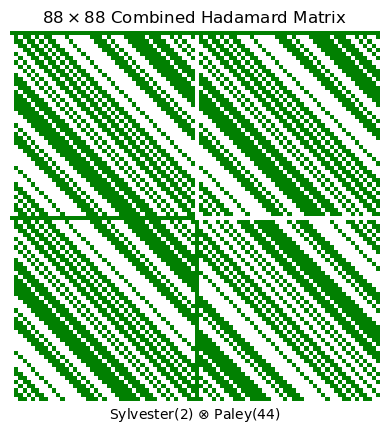

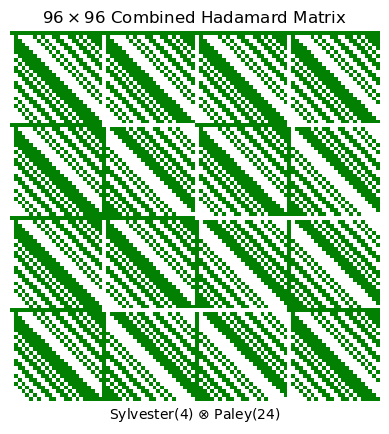

In [17]:
# Use the two given matrices to create a new Hadamard matrix with the Kronecker product
def combine_hadamard(A, B):
    return np.kron(A, B)

# Create some new Hadamard matrices by combining other Hadamard matrices
matrix1 = combine_hadamard(sylvester(2), paley1(20))
matrix2 = combine_hadamard(sylvester(2), paley2(1, 13))
matrix3 = combine_hadamard(sylvester(2), paley1(44))
matrix4 = combine_hadamard(sylvester(4), paley1(24))
combined_matrices = [matrix1, matrix2, matrix3, matrix4]

# Visualize the combined Hadamard matrix
fig1 = visualize(matrix1, title=rf'${matrix1.shape[0]} \times {matrix1.shape[0]}$ Combined Hadamard Matrix', displaynow=True, colors=['green', 'green', 'white'], text=r'Sylvester(2) $\otimes$ Paley(20)')
fig2 = visualize(matrix2, title=rf'${matrix2.shape[0]} \times {matrix2.shape[0]}$ Combined Hadamard Matrix', displaynow=True, colors=['green', 'green', 'white'], text=r'Sylvester(2) $\otimes$ Paley(28)')
fig3 = visualize(matrix3, title=rf'${matrix3.shape[0]} \times {matrix3.shape[0]}$ Combined Hadamard Matrix', displaynow=True, colors=['green', 'green', 'white'], text=r'Sylvester(2) $\otimes$ Paley(44)')
fig4 = visualize(matrix4, title=rf'${matrix4.shape[0]} \times {matrix4.shape[0]}$ Combined Hadamard Matrix', displaynow=True, colors=['green', 'green', 'white'], text=r'Sylvester(4) $\otimes$ Paley(24)')
combined_figs = [fig1, fig2, fig3, fig4]

# Save the combined Hadamard matrix to a PDF
save_to_pdf(combined_figs, 'combined_hadamard_matrices.pdf')

## Create a pdf with real Hadamard matrices of all possible orders up to $100$

In [18]:
# Store all the matrices in one list
all_matrices = sylvester_matrices + paley_matrices1 + paley_matrices2 + williamson_matrices + combined_matrices

# Make sure that all the matrices are indeed Hadamard
for matrix in all_matrices:
    if not check_hadamard(matrix):
        print('There is a matrix that is not Hadamard')
        break
else:
    print('All matrices are Hadamard')

# Create a dictionary to store matrices by their size
matrix_dict = {}
for matrix in all_matrices:
    size = matrix.shape[0]
    if size not in matrix_dict:
        matrix_dict[size] = []
    matrix_dict[size].append(matrix)

# Sort the dictionary by keys (matrix sizes)
matrix_dict = dict(sorted(matrix_dict.items()))
print('Sizes found:', list(matrix_dict.keys()))

# Visualize one Hadamard matrix of each size
colors = ['orange', 'orange', 'white']
figs = [visualize(matrix_dict[size][0], title=rf'${size} \times {size}$ Hadamard Matrix', colors=colors) for size in matrix_dict]
save_to_pdf(figs, 'hadamard_matrices_by_size.pdf')

All matrices are Hadamard
Sizes found: [1, 2, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 128, 256]
